<a href="https://colab.research.google.com/github/rubyvanrooyen/observation_planning/blob/main/comet67P/67P_observation_elevation_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installations

In [ ]:
!pip install git+https://github.com/ska-sa/astrokat.git

  Cloning https://github.com/ska-sa/astrokat.git to /tmp/pip-req-build-9_acrmg_
  Running command git clone -q https://github.com/ska-sa/astrokat.git /tmp/pip-req-build-9_acrmg_
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 99 kB 3.9 MB/s 
  Created wheel for astrokat: filename=astrokat-0.1.dev856+master.7dd7c9e-py3-none-any.whl size=61363 sha256=9ebbefd69b47011be1a85096c769389e94619bb5481a460b5dec62f4239c0648
  Stored in directory: /tmp/pip-ephem-wheel-cache-id3qr9kq/wheels/48/68/38/460259a8276bb666804bc42ac8074a069b535a1a1cccda1237
  Created wheel for pyephem: filename=pyephem-9.99-py3-none-any.whl size=1568 sha256=1f63c151fbd8480169f31766da980ce5f6ef17bcbf8fb1e3ff04f14aecd2b346
  Stored in directory: /root/.cache/pip/wheels/30/12/37/6d3c470a337d412e8ac33b581cb2d67c825eaf063db830d74c
Successfully built astrokat pyephem


In [ ]:
!git clone https://github.com/ska-sa/astrokat.git

Cloning into 'astrokat'...
remote: Enumerating objects: 3864, done.
remote: Counting objects: 100% (1326/1326), done.
remote: Compressing objects: 100% (639/639), done.
remote: Total 3864 (delta 908), reused 1060 (delta 685), pack-reused 2538
Receiving objects: 100% (3864/3864), 6.23 MiB | 27.39 MiB/s, done.
Resolving deltas: 100% (2684/2684), done.


In [ ]:
!ln -s /content/astrokat/scripts/astrokat-targets.py mkatcals.py

In [ ]:
import astrokat
import mkatcals

# Observation targets

Pointing information from pointing notebook (`67P daily pointing calculations.ipynb`)
```
Date 	  Time 	     RA 	         Dec 	         d (deg) 	 D [AU]
2021-08-01 03:32:30 	 1:37:5.919 	 5:17:38.690 	 0.6372 	 1.0684
Comet is visible for 11.558 hrs and deviates 0.6372 degrees (38.232 arcmin) from assigned pointing position during this time
```

In [ ]:
target = ['67P', '1:37:5.919', '5:17:38.690']
cal_tags = ['gain', 'flux', 'bp']


Observation Table for 2021/8/1 00:00:00 (UTC)
Times listed in LST for target rise and set times
Target visible when above 14.999999999999998 degrees
Sources         Class                           RA              Decl            Rise Time       Set Time        Separation      Notes           
67P             radec target                    1:37:05.92      5:17:38.7       21:02:15.74     6:14:09.86      104.21          Separation from Sun
J0059+0006      radec bpcal                     0:59:05.51      0:06:51.6       20:10:50.85     5:49:32.24      10.81           Separation from 67P
J0108+0134      radec gaincal                   1:08:38.77      1:35:00.3       20:24:06.38     5:55:23.55      8.01                            
J0408-6545      radec bpcal fluxcal             4:08:20.38      -65:45:09.1     19:45:37.19     12:31:20.95     76.17 ***                       



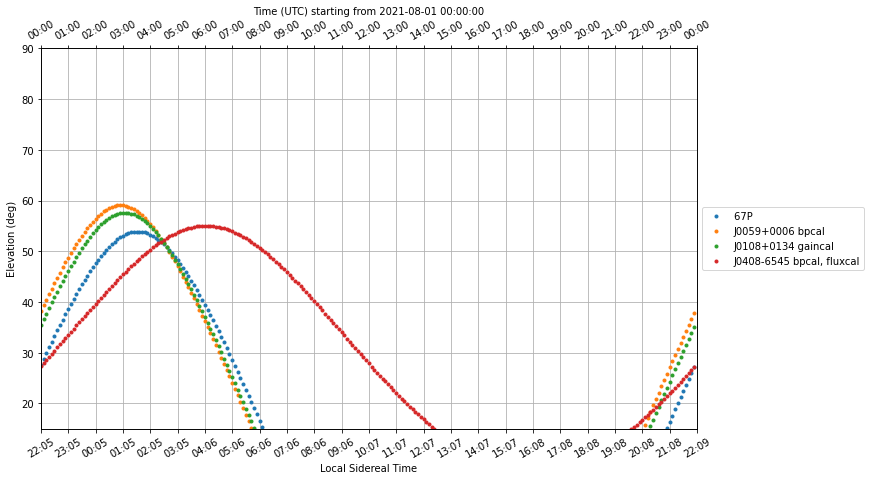

In [ ]:
mkatcals.main(creation_time = '2021-08-01 00:00',
              horizon=15,
              target=target,
              cal_tags=cal_tags,
              mkat_catalogues='/content/astrokat/catalogues',
              lst=True)

In [ ]:
sources = [
           '67P, radec target, 1:37:05.92, 5:17:38.7',
           'J0108+0134, radec gaincal, 1:08:38.77, 1:35:00.3',
           'J0408-6545, radec bpcal fluxcal, 4:08:20.38, -65:45:09.1',
           ]
obsfile = 'comet67P_observe.csv'
with open(obsfile, 'w') as fout:
    for line in sources:
        print(line)
        fout.write(line+"\n")

67P, radec target, 1:37:05.92, 5:17:38.7
J0108+0134, radec gaincal, 1:08:38.77, 1:35:00.3
J0408-6545, radec bpcal fluxcal, 4:08:20.38, -65:45:09.1



Observation Table for 2021/8/1 03:32:00 (UTC)
Times listed in LST for target rise and set times
Target visible when above 14.999999999999998 degrees
Sources         Class                           RA              Decl            Rise Time       Set Time        Separation      Notes           
67P             radec target                    1:37:05.92      5:17:38.7       21:02:15.75     6:14:09.86      104.35          Separation from Sun
J0108+0134      radec target gaincal            1:08:38.77      1:35:00.3       20:24:06.38     5:55:23.55      8.01            Separation from 67P
J0408-6545      radec target bpcal fluxcal      4:08:20.38      -65:45:09.1     19:45:37.18     12:31:20.95     76.17 ***                       



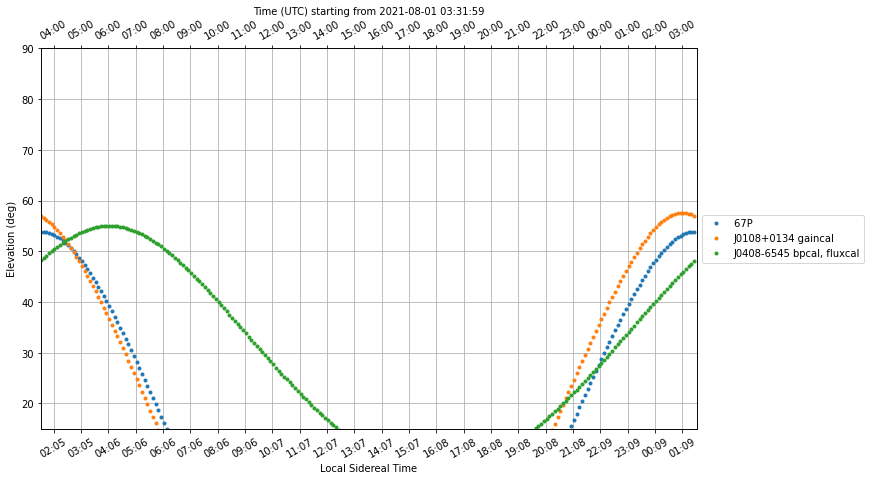

In [ ]:
mkatcals.main(creation_time = '2021-08-01 03:32',
              horizon=15,
              infile=obsfile,
              mkat_catalogues='/content/astrokat/catalogues',
              lst=True)